# Big Data Mart Sales Problem


## Import modules

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [105]:
df = pd.read_csv('bigdatamart_Train.csv')
dft = pd.read_csv('bigdatamart_Test.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [107]:
# statistical info
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [108]:
dft.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [109]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [111]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))
dft.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## Preprocessing the dataset

In [112]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
# check for null values
dft.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [114]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [115]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [116]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [117]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [118]:
# fill the missing values
item_weight_mean1 = dft.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean1

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [119]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [120]:
miss_bool1 = dft['Item_Weight'].isnull()
miss_bool1

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [121]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [122]:
dft["Item_Weight"]=dft["Item_Weight"].fillna(dft["Item_Weight"].mean())

In [123]:
df['Item_Weight'].isnull().sum()


0

In [124]:
dft['Item_Weight'].isnull().sum()

0

In [125]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [126]:
outlet_size_mode1 = dft.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [127]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [128]:
df['Outlet_Size'].isnull().sum()

0

In [129]:
miss_bool = dft['Outlet_Size'].isnull()
dft.loc[miss_bool, 'Outlet_Size'] = dft.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
dft['Outlet_Size'].isnull().sum()

0

In [130]:
sum(df['Item_Visibility']==0)

526

In [131]:
sum(dft['Item_Visibility']==0)

353

## Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

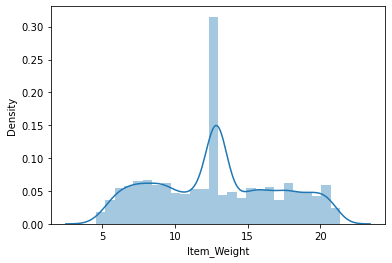

In [132]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

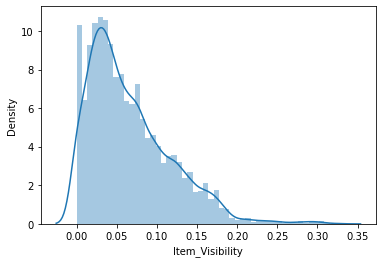

In [133]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

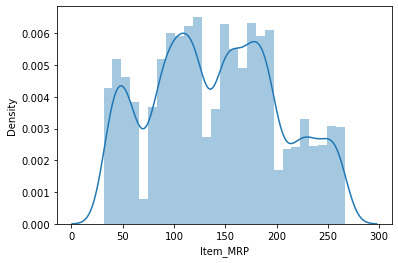

In [134]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

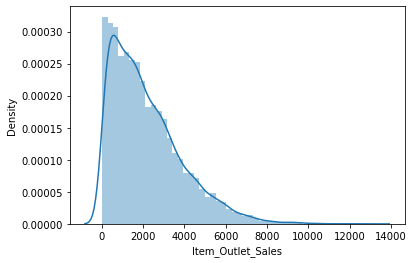

In [135]:
sns.distplot(df['Item_Outlet_Sales'])

In [136]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

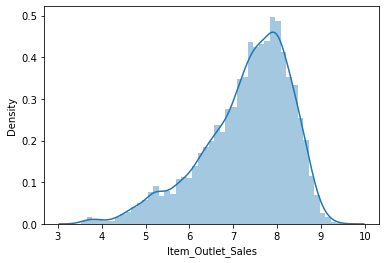

In [137]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

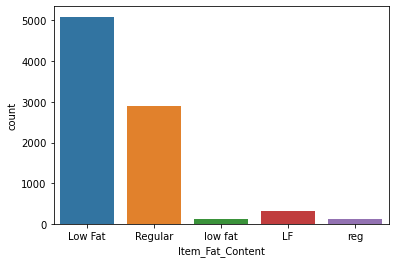

In [138]:
sns.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

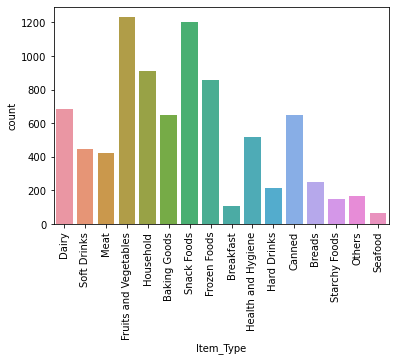

In [139]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

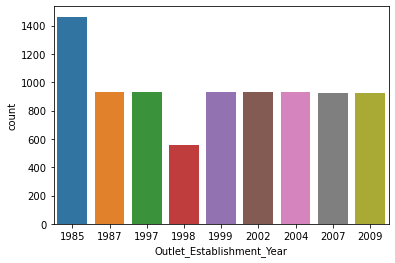

In [140]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

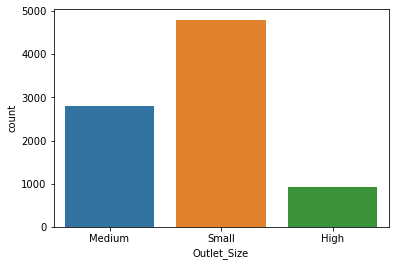

In [141]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

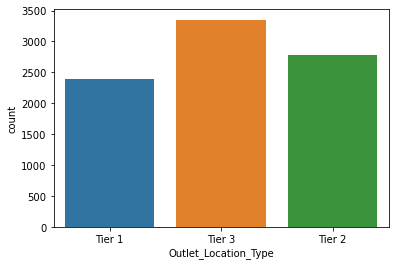

In [142]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

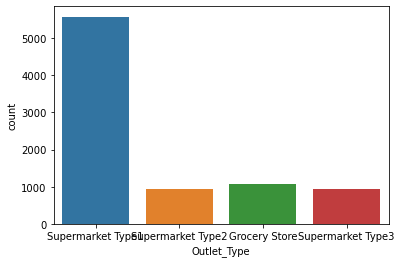

In [143]:
sns.countplot(df['Outlet_Type'])

## Correlation Matrix

<AxesSubplot:>

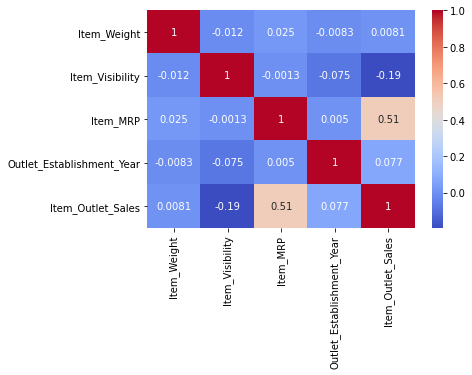

In [144]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [145]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


In [146]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Label Encoding

In [158]:
#Encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [159]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,8.225808
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,6.096776
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,7.648868
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,6.597664
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,6.903451


In [160]:
#Encoding all categorical columns for test data
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dft[column] = label_encoders[column].fit_transform(dft[column])

In [162]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


## Input Split

In [172]:
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier we can drop from dataset

In [173]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [174]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    modDTR = DecisionTreeRegressor()
    
    # Training the model
    modDTR.fit(x_train, y_train)
    
    # Predcting the value
    pred = modDTR.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is ",maxAccuracy," on Random_state ",maxRS)

Best accuracy is  0.5243834386324755  on Random_state  188


In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error as mse

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


In [177]:
ModRFR=RandomForestRegressor()
ModRFR.fit(x_train,y_train)
pred=ModRFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('MSE:',mse(y_test,ModRFR.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(ModRFR,x,y,cv=10,scoring='r2')))

R2_Score: 0.7211357863751497
MSE: 0.29729538423676816
Avg_CVscore: 0.6964923724050845


In [178]:
modlr=LinearRegression()
modlr.fit(x_train,y_train)
pred=modlr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('MSE:',mse(y_test,modlr.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(modlr,x,y,cv=10,scoring='r2')))

R2_Score: 0.5547618889273347
MSE: 0.4746655499019018
Avg_CVscore: 0.5396141923788413


In [179]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('MSE:',mse(y_test,knn.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(knn,x,y,cv=10,scoring='r2')))

R2_Score: 0.33280751403936193
MSE: 0.7112897129941265
Avg_CVscore: 0.36142086930026107


In [180]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('MSE:',mse(y_test,DTR.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(DTR,x,y,cv=10,scoring='r2')))

R2_Score: 0.48273408862206824
MSE: 0.5514539347905076
Avg_CVscore: 0.45169690049180067


In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [182]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modls=Lasso()
df_new=GridSearchCV(modls,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [183]:
modls=Lasso(alpha=0.001,random_state=0)
modls.fit(x_train,y_train)
modls.score(x_train,y_train)
pred_ls=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))
print('MSE:',mse(y_test,modls.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(modls,x,y,cv=10,scoring='r2')))

R2_Score: 0.554931809566782
MSE: 0.47448439857689806
Avg_CVscore: 0.5392583628020391


In [184]:
mod_lr=Ridge(alpha=0.001,random_state=0)
mod_lr.fit(x_train,y_train)
mod_lr.score(x_train,y_train)
pred_lr=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lr))
print('MSE:',mse(y_test,mod_lr.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(mod_lr,x,y,cv=10,scoring='r2')))

R2_Score: 0.554931809566782
MSE: 0.4746653122124179
Avg_CVscore: 0.5396141996971753


In [185]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_test))
print('MSE:',mse(y_test,svr.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(svr,x,y,cv=10,scoring='r2')))

R2_Score: 0.3079491141537306
MSE: 0.7377910967659861
Avg_CVscore: 0.32355998421512744


In [186]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_test))
print('MSE:',mse(y_test,GBR.predict(x_test)))
print('Avg_CVscore:',np.mean(cross_val_score(GBR,x,y,cv=10,scoring='r2')))

R2_Score: 0.7544956296798462
MSE: 0.26173066510543436
Avg_CVscore: 0.7344707172780967


In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
print("Linear Regression:",cross_val_score(modlr,x,y,cv=5).mean())
print("Random Forest Regressor:",cross_val_score(ModRFR,x,y,cv=5).mean())
print("K-Neighbors Regressor:",cross_val_score(knn,x,y,cv=5).mean())
print("Decision Tree Regressor:",cross_val_score(DTR,x,y,cv=5).mean())
print("Lasso Regression:",cross_val_score(modls,x,y,cv=5).mean())
print("Ridge Regression:",cross_val_score(mod_lr,x,y,cv=5).mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=5).mean())
print("Gradient Boosting Regressor:",cross_val_score(GBR,x,y,cv=5).mean())

Linear Regression: 0.5401448239289037
Random Forest Regressor: 0.6944269318942635
K-Neighbors Regressor: 0.35216612605298103
Decision Tree Regressor: 0.4381263514772186
Lasso Regression: 0.5397996222370365
Ridge Regression: 0.5401448339138172
Support Vector Machine: 0.31658404447015986
Gradient Boosting Regressor: 0.7350266529025893


# Model Saving

GradientBoostingRegressor is giving best results compare to others so we will create model using GBR.

In [189]:
import pickle
filename='BigDataMartPredict.pkl'
pickle.dump(GBR,open(filename,'wb'))

       Predict
0     7.273261
1     7.987233
2     4.606889
3     8.158278
4     8.048604
...        ...
2552  7.447624
2553  7.803513
2554  8.198581
2555  7.823676
2556  7.604124

[2557 rows x 1 columns]


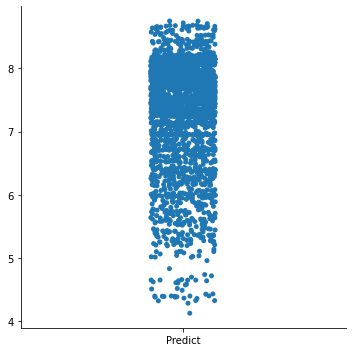

In [190]:
res=pd.DataFrame()
res['Predict']=GBR.predict(x_test)

print(res)
sns.catplot(data=res)

Prediction for Test File